In [ ]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

In [1]:
from sklearn.linear_model import LassoCV
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import train_test_split 

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])

# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Pandas to Numpy
names = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']
x = df[names].values
y = df['mpg'].values # regression

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=45)

In [2]:
# Simple function to evaluate the coefficients of a regression
%matplotlib inline    
from IPython.display import display, HTML    

def report_coef(names,coef,intercept):
    r = pd.DataFrame( { 'coef': coef, 'positive': coef>=0  }, index = names )
    r = r.sort_values(by=['coef'])
    display(r)
    print(f"Intercept: {intercept}")
    r['coef'].plot(kind='barh', color=r['positive'].map(
        {True: 'b', False: 'r'}))

Final score (RMSE): 3.0019345985860766


,coef,positive
cylinders,-0.427721,False
weight,-0.007255,False
horsepower,-0.005491,False
displacement,0.020166,True
acceleration,0.138575,True
year,0.783047,True
origin,1.003762,True


Intercept: -19.101231042200112


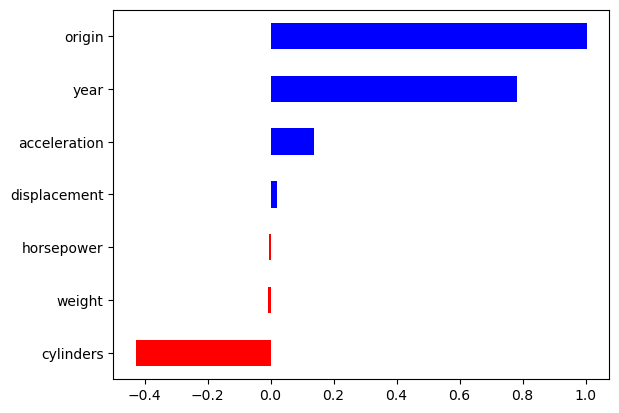

In [3]:
import sklearn

# Create linear regression
regressor = sklearn.linear_model.LinearRegression()

# Fit/train linear regression
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

Final score (RMSE): 3.060402190403332


,coef,positive
cylinders,-0.012995,False
weight,-0.007328,False
horsepower,-0.002715,False
displacement,0.011601,True
acceleration,0.114391,True
origin,0.708222,True
year,0.777480,True


Intercept: -18.506677982383223


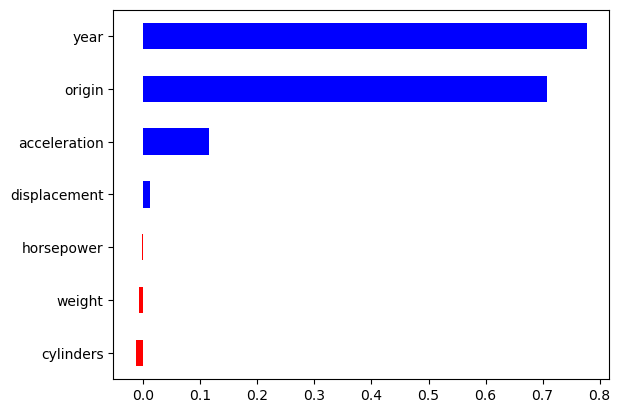

In [4]:
import sklearn
from sklearn.linear_model import Lasso

# Create linear regression
regressor = Lasso(random_state=0,alpha=0.1)

# Fit/train LASSO
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

Final score (RMSE): {score}


,coef,positive
cylinders,-0.421393,False
weight,-0.007257,False
horsepower,-0.005385,False
displacement,0.020006,True
acceleration,0.138470,True
year,0.782889,True
origin,0.994621,True


Intercept: -19.079800744254904


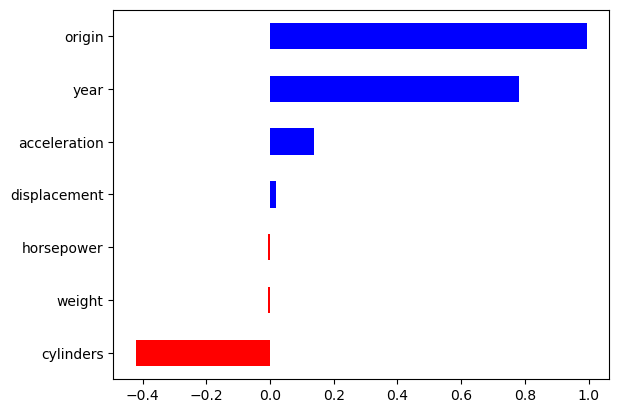

In [5]:
import sklearn
from sklearn.linear_model import Ridge

# Create linear regression
regressor = Ridge(alpha=1)

# Fit/train Ridge
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

Final score (RMSE): 3.0450899960775026


,coef,positive
cylinders,-0.274010,False
weight,-0.007303,False
horsepower,-0.003231,False
displacement,0.016194,True
acceleration,0.132348,True
year,0.777482,True
origin,0.782781,True


Intercept: -18.389355690429767


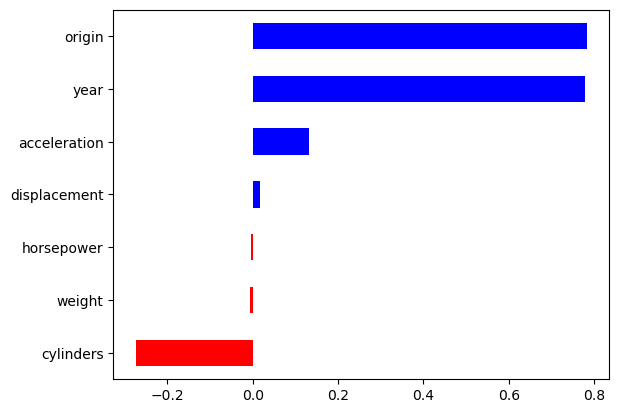

In [6]:
import sklearn
from sklearn.linear_model import ElasticNet

# Create linear regression
regressor = ElasticNet(alpha=0.1, l1_ratio=0.1)

# Fit/train LASSO
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)